# Airline Sentimental Analysis

# Version 1.0

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt

base_url = "https://www.airlinequality.com/airline-reviews/emirates"
pages = 2
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

df = pd.DataFrame()
df["reviews"] = reviews
df.head()

# write the dataframe to a CSV file 
df.to_csv("e_reviews.csv", index = False)

# Read the CSV file into a pandas DataFrame
reviews = pd.read_csv("e_reviews.csv")

reviews.head()

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# Convert integer values to string
reviews['reviews'] = reviews['reviews'].astype(str)

# Replace specified strings in the DataFrame
reviews['reviews'] = reviews['reviews'].str.replace('Trip Verified |', '')
reviews['reviews'] = reviews['reviews'].str.replace('Not Verified |', '')
reviews['reviews'] = reviews['reviews'].str.replace('✅', '')
reviews['reviews'] = reviews['reviews'].str.replace('|', '')

# Remove punctuations from the DataFrame
reviews['reviews'] = reviews['reviews'].apply(remove_punctuations)

#Generate Polarity scores
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

reviews['compound'] = [sentiment.polarity_scores(review)['compound'] for review in reviews['reviews']]
reviews['neg'] = [sentiment.polarity_scores(review)['neg'] for review in reviews['reviews']]
reviews['neu'] = [sentiment.polarity_scores(review)['neu'] for review in reviews['reviews']]
reviews['pos'] = [sentiment.polarity_scores(review)['pos'] for review in reviews['reviews']]

reviews.head()

reviews[['compound','neg', 'neu', 'pos']].describe()

# Calculate the number of Positive reviews
num_pos = (reviews['compound']>=0).sum()
num_pos_df = pd.DataFrame({'Number of positive reviews': [num_pos]})
num_pos_df

# Calculate Positive reviews as percentage of total reviews
perc_pos = (reviews['compound']>=0).sum()/reviews['reviews'].count()*100
perc_pos_df = pd.DataFrame({'% positive reviews': [perc_pos]})
perc_pos_df

# Calculate the number of Negative reviews
num_neg = (reviews['compound']<=0).sum()
num_neg_df = pd.DataFrame({'Number of Negative reviews': [num_neg]})
num_neg_df

#Calculate Negative reviews as percentage of total reviews
perc_neg = (reviews['compound']<=0).sum()/reviews['reviews'].count()*100
perc_neg_df = pd.DataFrame({'% Negative reviews': [perc_neg]})
perc_neg_df

#Explore the distribution of compound scores
sns.histplot(reviews['compound'])

#Explore the distribution of Positive scores
sns.histplot(reviews['pos'])

#Explore the distribution of Negative scores
sns.histplot(reviews['neg'])

#create function to be used for Tokenization, removing stop words and stemming
import nltk
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')
def preprocess_text(text):
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
    return stemmed_text

#Create df for Positive and Negative reviews
dfreviews = reviews
dfreviews['processed_review'] = reviews['reviews'].apply(preprocess_text)
positive_reviews = dfreviews.loc[(dfreviews['compound']>0),:]
negative_reviews = dfreviews.loc[(dfreviews['compound']<0),:]

#Visualize top 10 of the most frequent words using freq distribution
#Use list comprehension to create a list of words appearing in positive reviews
pos_tokens = [word for Review in positive_reviews['processed_review'] for word in Review]
from nltk.probability import FreqDist
pos_freqdist = FreqDist(pos_tokens)
pos_freqdist.tabulate(10)

pos_freqdist.plot(10)

#Use list comprehension to create a list of words appearing in neg reviews
neg_tokens = [word for Review in negative_reviews['processed_review'] for word in Review]
neg_freqdist = FreqDist(neg_tokens)
neg_freqdist.tabulate(10)

neg_freqdist.plot(10)

#using wordcloud lib
#Generate word cloud for postive reviews
from wordcloud import WordCloud
wordcloudpos = WordCloud(background_color='white').generate_from_text(' '.join(pos_tokens))
plt.figure(figsize=(12,12))
plt.imshow(wordcloudpos, interpolation='bilinear')
plt.axis('off')
plt.show()

#Generate word cloud for negative reviews
wordcloudneg = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))
plt.figure(figsize=(12,12))
plt.imshow(wordcloudneg, interpolation='bilinear')
plt.axis('off')
plt.show()

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Version 1.1

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Scraping page 1
   ---> 100 total reviews collected so far
Scraping page 2
   ---> 200 total reviews collected so far


,reviews
0,✅ Trip Verified | The flight was scheduled for...
1,Not Verified | Flights from Australia to Europ...
2,Not Verified | Wow! Ever since the the Aussie ...
3,✅ Trip Verified | I had a flight from Cairo ...
4,Not Verified | I had the most horrible experi...


Reviews saved to e_reviews.csv


,reviews,compound,neg,neu,pos
0,The flight was scheduled for 930 AM but was ...,-0.9454,0.279,0.721,0.000
1,Flights from Australia to Europe return went ...,0.5319,0.016,0.923,0.061
2,Wow Ever since the the Aussie exec management...,-0.7433,0.079,0.872,0.049
3,I had a flight from Cairo to Dubai on 25 D...,-0.8815,0.092,0.863,0.045
4,I had the most horrible experience on Emirat...,-0.9140,0.115,0.804,0.081


Number of Positive Reviews: 92 (46.00%)
Number of Negative Reviews: 108 (54.00%)


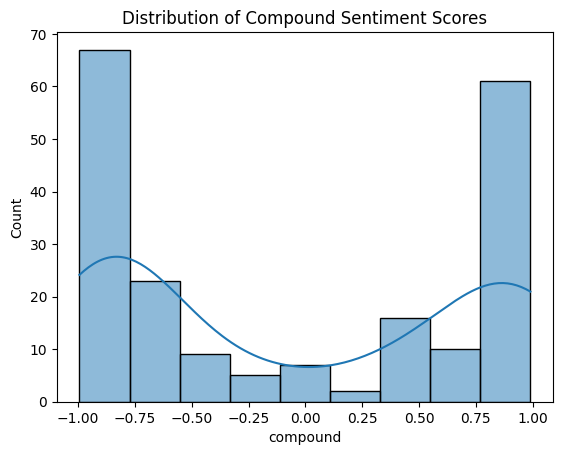

In [ ]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from wordcloud import WordCloud
import nltk

# Ensure NLTK resources are available
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Set the base URL and parameters for scraping
base_url = "https://www.airlinequality.com/airline-reviews/emirates"
pages = 2  # Number of pages to scrape
page_size = 100  # Number of reviews per page

# Initialize an empty list to store reviews
reviews = []

# Scraping reviews
for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Construct the URL
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Add headers to mimic a real browser
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36"
    }
    response = requests.get(url, headers=headers)

    # Check response status
    if response.status_code != 200:
        print(f"Failed to retrieve page {i}. Status code: {response.status_code}")
        continue

    # Parse HTML content
    parsed_content = BeautifulSoup(response.content, 'html.parser')

    # Extract reviews
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews collected so far")

# Convert reviews into a DataFrame
df = pd.DataFrame({"reviews": reviews})
display(df.head())  # Display the first few rows

# Save reviews to CSV
df.to_csv("e_reviews.csv", index=False)
print("Reviews saved to e_reviews.csv")

# Load reviews from the saved CSV file
reviews = pd.read_csv("e_reviews.csv")

# Clean and preprocess reviews
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# Convert reviews to string and clean the text
reviews['reviews'] = reviews['reviews'].astype(str)
reviews['reviews'] = reviews['reviews'].str.replace('Trip Verified |', '', regex=False)
reviews['reviews'] = reviews['reviews'].str.replace('Not Verified |', '', regex=False)
reviews['reviews'] = reviews['reviews'].str.replace('✅', '', regex=False)
reviews['reviews'] = reviews['reviews'].apply(remove_punctuations)

# Initialize VADER sentiment analyzer
sentiment = SentimentIntensityAnalyzer()

# Generate sentiment scores
reviews['compound'] = reviews['reviews'].apply(lambda x: sentiment.polarity_scores(x)['compound'])
reviews['neg'] = reviews['reviews'].apply(lambda x: sentiment.polarity_scores(x)['neg'])
reviews['neu'] = reviews['reviews'].apply(lambda x: sentiment.polarity_scores(x)['neu'])
reviews['pos'] = reviews['reviews'].apply(lambda x: sentiment.polarity_scores(x)['pos'])

# Display sentiment scores
display(reviews.head())

# Sentiment analysis summary
num_pos = (reviews['compound'] > 0).sum()
perc_pos = (num_pos / len(reviews)) * 100

num_neg = (reviews['compound'] <= 0).sum()
perc_neg = (num_neg / len(reviews)) * 100

print(f"Number of Positive Reviews: {num_pos} ({perc_pos:.2f}%)")
print(f"Number of Negative Reviews: {num_neg} ({perc_neg:.2f}%)")

# Visualize sentiment distribution
sns.histplot(reviews['compound'], kde=True)
plt.title("Distribution of Compound Sentiment Scores")
plt.show()

# Tokenization and preprocessing
stop_words = nltk.corpus.stopwords.words('english')

def preprocess_text(text):
    tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
    return stemmed_text

# Apply preprocessing
reviews['processed_review'] = reviews['reviews'].apply(preprocess_text)

# Separate positive and negative reviews
positive_reviews = reviews[reviews['compound'] > 0]
negative_reviews = reviews[reviews['compound'] <= 0]

# Visualize most frequent words in positive reviews
pos_tokens = [word for review in positive_reviews['processed_review'] for word in review]
pos_freqdist = FreqDist(pos_tokens)
pos_freqdist.plot(10, title="Top 10 Words in Positive Reviews")

# Visualize most frequent words in negative reviews
neg_tokens = [word for review in negative_reviews['processed_review'] for word in review]
neg_freqdist = FreqDist(neg_tokens)
neg_freqdist.plot(10, title="Top 10 Words in Negative Reviews")

# Generate word clouds
wordcloud_pos = WordCloud(background_color='white').generate(' '.join(pos_tokens))
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Reviews")
plt.show()

wordcloud_neg = WordCloud(background_color='white').generate(' '.join(neg_tokens))
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Reviews")
plt.show()

# Version 1.2 Using Transformers

In [ ]:
# Install required libraries (uncomment if needed)
# !pip install transformers
# !pip install requests beautifulsoup4 pandas matplotlib seaborn nltk

# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import pipeline
from wordcloud import WordCloud

# Set base URL and parameters for scraping
base_url = "https://www.airlinequality.com/airline-reviews/emirates"
pages = 2  # Number of pages to scrape
page_size = 100  # Number of reviews per page

# Initialize an empty list to store reviews
reviews = []

# Scrape reviews from the website
for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Construct the URL
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Add headers to mimic a real browser
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36"
    }
    response = requests.get(url, headers=headers)

    # Check response status
    if response.status_code != 200:
        print(f"Failed to retrieve page {i}. Status code: {response.status_code}")
        continue

    # Parse HTML content
    parsed_content = BeautifulSoup(response.content, 'html.parser')

    # Extract reviews
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text(strip=True))
    
    print(f"   ---> {len(reviews)} total reviews collected so far")

# Convert reviews into a DataFrame
df = pd.DataFrame({"reviews": reviews})
df.to_csv("e_reviews.csv", index=False)
print("Reviews saved to e_reviews.csv")

# Load the saved CSV file
df = pd.read_csv("e_reviews.csv")

# Initialize sentiment analysis pipeline using Hugging Face
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Apply the pipeline to classify reviews
def analyze_sentiment(review):
    result = sentiment_pipeline(review[:512])[0]  # Limit input to 512 characters for transformers
    return result['label'], result['score']

# Analyze sentiment for all reviews
df[['sentiment', 'confidence']] = df['reviews'].apply(lambda x: pd.Series(analyze_sentiment(x)))

# Display a summary of the results
print(df.head())
df.to_csv("e_reviews_with_sentiment.csv", index=False)
print("Sentiment analysis results saved to e_reviews_with_sentiment.csv")

# Visualize sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Generate word clouds for positive and negative reviews
positive_reviews = ' '.join(df[df['sentiment'] == 'POSITIVE']['reviews'])
negative_reviews = ' '.join(df[df['sentiment'] == 'NEGATIVE']['reviews'])

# Positive word cloud
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Reviews")
plt.show()

# Negative word cloud
negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Reviews")
plt.show()